In [4]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import mplhep as hep
from scipy.optimize import curve_fit
import pandas as pd

plt.style.use(hep.style.ROOT)

### User Defined

In [5]:
### Variables used in software
baseline = 100

In [36]:
with open('Run1_list.txt') as f:
    lines = f.read().split('\n')
tags = None
channels =[]
din={}
for line in lines:
    if line[:2]=="//" or len(line)==0:
        continue
    #first line after comments
    if tags is None:
        tags = line.split()
        tags=tags[-3:]
        continue;
    split = line.split()
    channel, LG, HG = split[-3:]
    if channel not in channels:
        din[f"Ch_{channel}_LG"] = []
        din[f"Ch_{channel}_HG"] = []
        channels.append(channel)
    din[f"Ch_{channel}_LG"].append(float(LG)-baseline)
    din[f"Ch_{channel}_HG"].append(float(HG)-baseline)
df = pd.DataFrame(din)
print(f"Done! Total events: {len(df)}")

Done! Total events: 1425


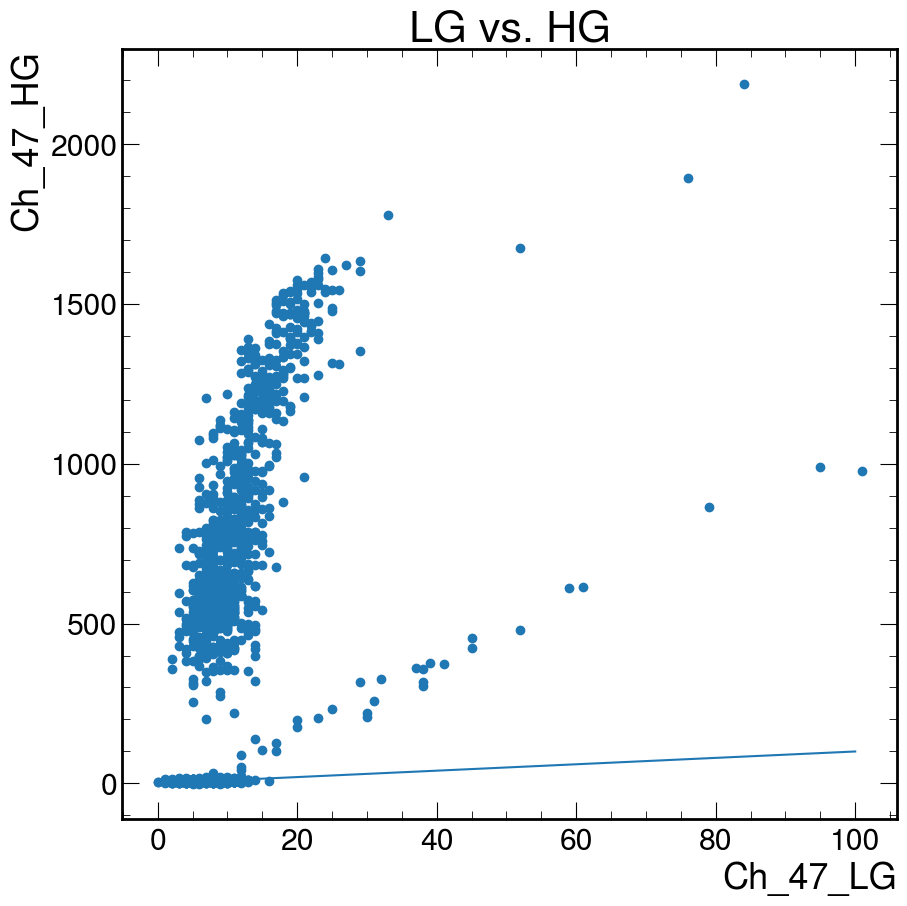

In [33]:
plt.scatter(df.Ch_47_LG,df.Ch_47_HG,label="Raw")
plt.plot(np.linspace(0,100,2),np.linspace(0,100,2),label="Ch_47_LG = Ch_47_HG")
plt.title("LG vs. HG")
plt.xlabel("Ch_47_LG")
plt.ylabel("Ch_47_HG")
plt.show()

Text(0, 1, 'Ch_63_HG')

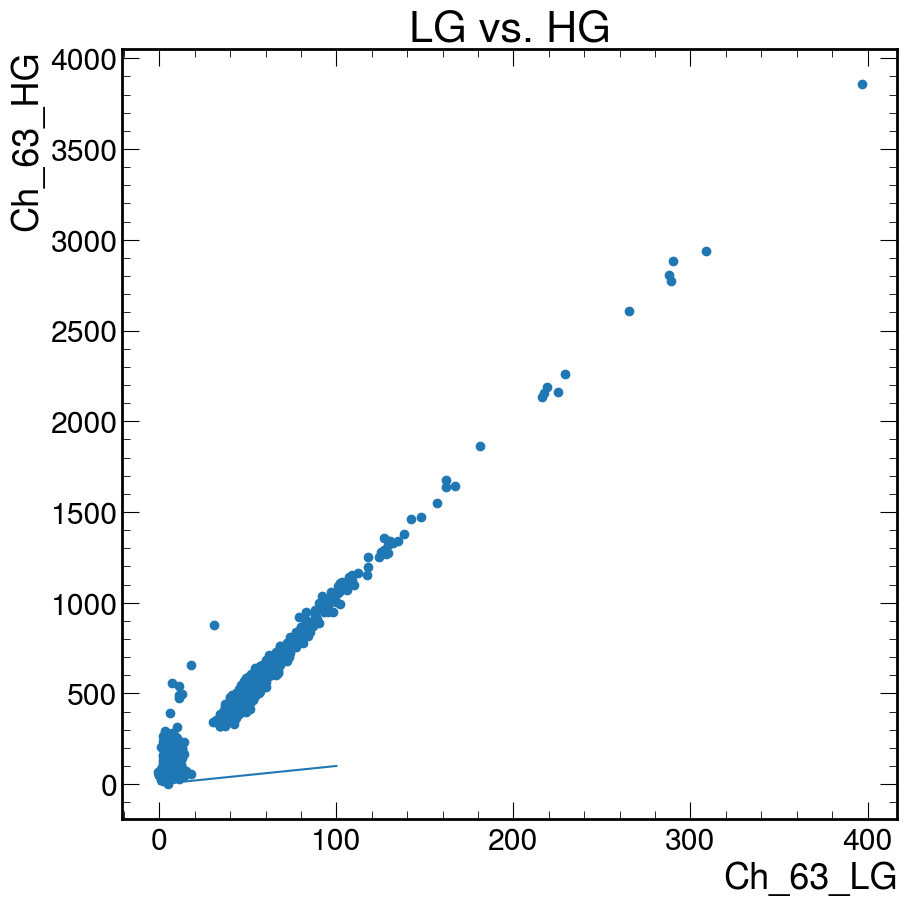

In [34]:
plt.scatter(df.Ch_63_LG,df.Ch_63_HG,label="Raw")
plt.plot(np.linspace(0,100,2),np.linspace(0,100,2),label="Ch_63_LG = Ch_63_HG")
plt.title("LG vs. HG")
plt.xlabel("Ch_63_LG")
plt.ylabel("Ch_63_HG")

Text(0, 1, 'Ch_62_HG')

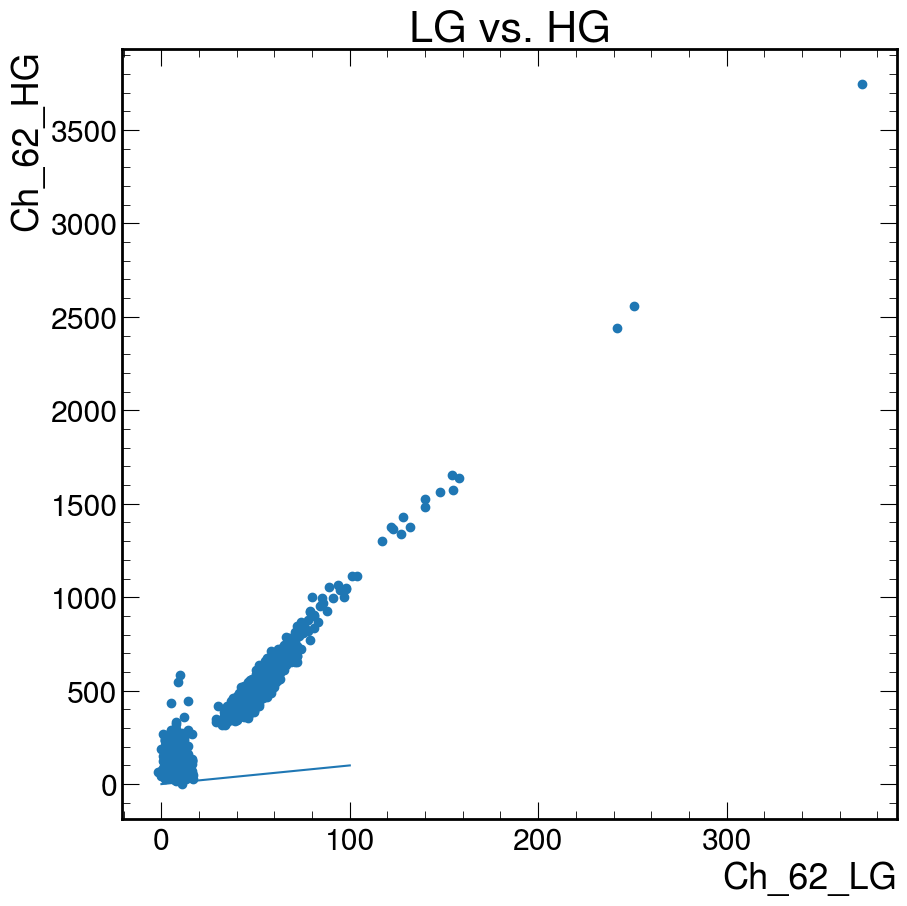

In [35]:
plt.scatter(df.Ch_62_LG,df.Ch_62_HG,label="Raw")
plt.plot(np.linspace(0,100,2),np.linspace(0,100,2),label="Ch_62_LG = Ch_62_HG")
plt.title("LG vs. HG")
plt.xlabel("Ch_62_LG")
plt.ylabel("Ch_62_HG")

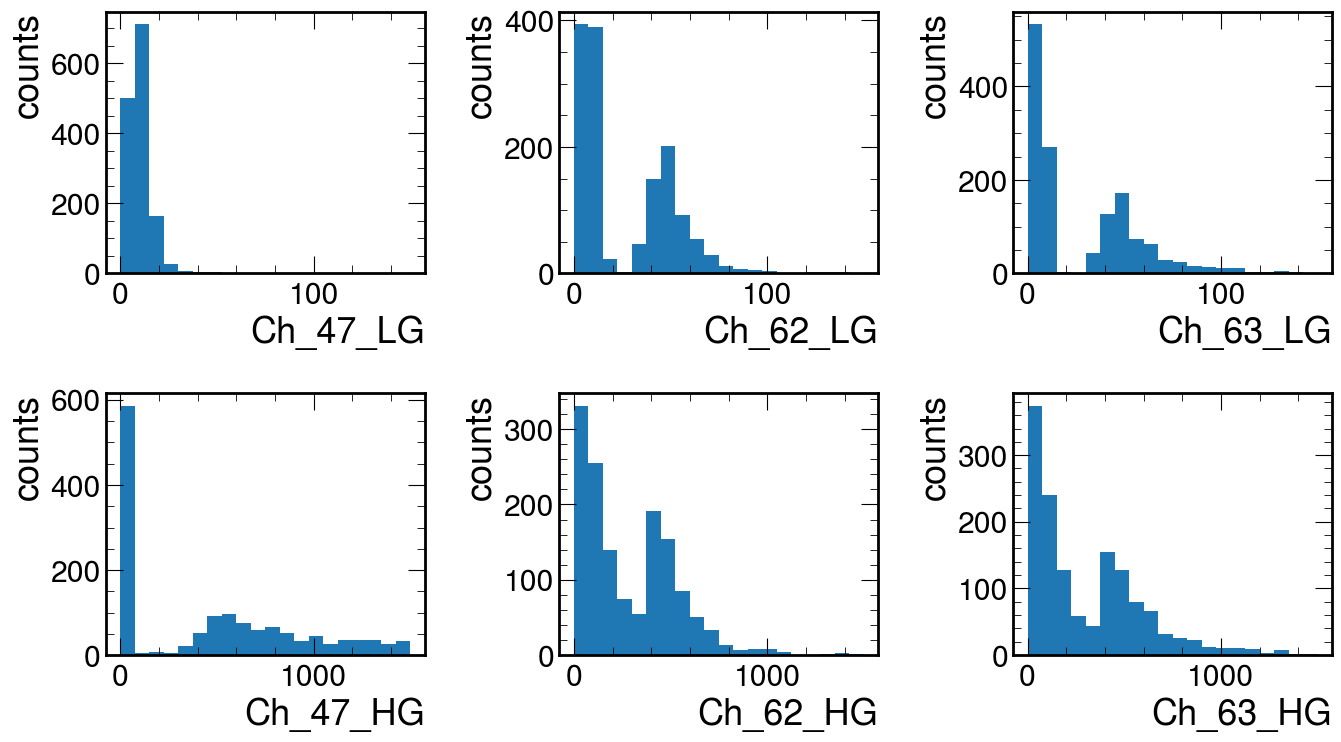

In [43]:
fig,axs=plt.subplots(2,3,figsize=(14,8))
for i in range(2):
    for j in range(3):
        plt.sca(axs[i][j])
        lbl=f'Ch_{[47,62,63][j]}_{"LG HG".split()[i]}'
        plt.hist(df[lbl], bins=20, range=(0, 150 if i ==0 else 1500))
        plt.xlabel(lbl)
        plt.ylabel("counts")
plt.tight_layout()
plt.show()